Lambda School Data Science

*Unit 4, Sprint 3, Module 2*

---

# Convolutional Neural Networks (Prepare)

> Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers. *Goodfellow, et al.*

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe convolution and pooling
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
- <a href="#p3">Part 3: </a>Use a pre-trained convolution neural network for image classification

Modern __computer vision__ approaches rely heavily on convolutions as both a dimensionality reduction and feature extraction method. Before we dive into convolutions, let's talk about some of the common computer vision applications: 
* Classification [(Hot Dog or Not Dog)](https://www.youtube.com/watch?v=ACmydtFDTGs)
* Object Detection [(YOLO)](https://www.youtube.com/watch?v=MPU2HistivI)
* Pose Estimation [(PoseNet)](https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html)
* Facial Recognition [Emotion Detection](https://www.cbronline.com/wp-content/uploads/2018/05/Mona-lIsa-test-570x300.jpg)
* and *countless* more 

We are going to focus on classification and pre-trained classification today. What are some of the applications of image classification?

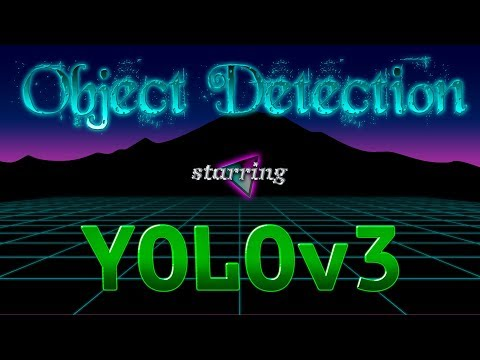

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MPU2HistivI', width=600, height=400)

# Convolution & Pooling (Learn)
<a id="p1"></a>

## Overview

Like neural networks themselves, CNNs are inspired by biology - specifically, the receptive fields of the visual cortex.

Put roughly, in a real brain the neurons in the visual cortex *specialize* to be receptive to certain regions, shapes, colors, orientations, and other common visual features. In a sense, the very structure of our cognitive system transforms raw visual input, and sends it to neurons that specialize in handling particular subsets of it.

CNNs imitate this approach by applying a convolution. A convolution is an operation on two functions that produces a third function, showing how one function modifies another. Convolutions have a [variety of nice mathematical properties](https://en.wikipedia.org/wiki/Convolution#Properties) - commutativity, associativity, distributivity, and more. Applying a convolution effectively transforms the "shape" of the input.

One common confusion - the term "convolution" is used to refer to both the process of computing the third (joint) function and the process of applying it. In our context, it's more useful to think of it as an application, again loosely analogous to the mapping from visual field to receptive areas of the cortex in a real animal.

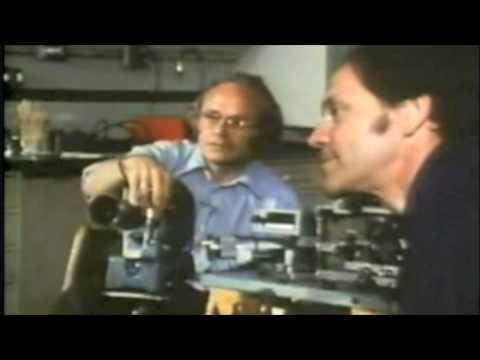

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4', width=600, height=400)

## Follow Along

Let's try to do some convolutions and pooling

### Convolution

Consider blurring an image - assume the image is represented as a matrix of numbers, where each number corresponds to the color value of a pixel.

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.27.17+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*


Helpful Terms:
- __Filter__: The weights (parameters) we will apply to our input image.
- __Stride__: How the filter moves across the image
- __Padding__: Zeros (or other values) around the  the input image border (kind of like a frame of zeros). 

In [5]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

austen = io.imread('https://dl.airtable.com/S1InFmIhQBypHBL0BICi_austen.jpg')
austen_grayscale = rescale_intensity(color.rgb2gray(austen))
austen_grayscale.shape

(400, 400)

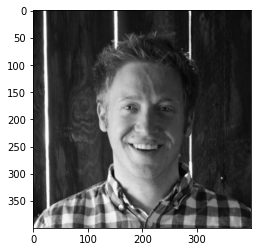

In [6]:
plt.imshow(austen_grayscale, cmap="gray");

In [7]:
austen_grayscale.shape

(400, 400)

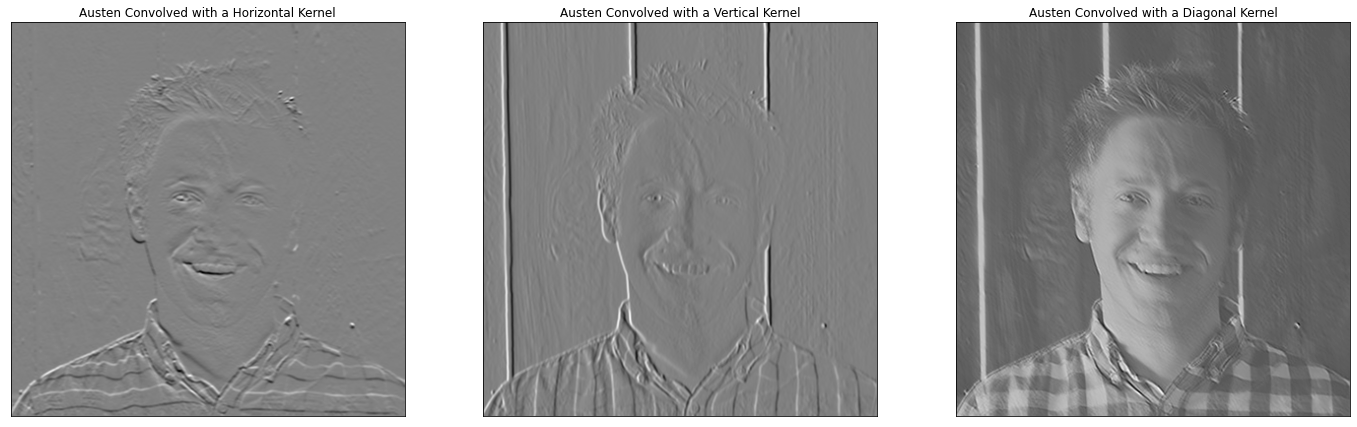

In [8]:
import numpy as np
import scipy.ndimage as nd

kernels=['Horizontal', 'Vertical', 'Diagonal']
horizontal = np.array([[1,1,1],
                       [0,0,0],
                       [-1,-1,-1]])

vertical = np.array([[1,0,-1],
                     [1,0,-1],
                     [1,0,-1]])

diagonal = np.array([[1,0,-1],
                     [0,1,0],
                     [-1,0,1]])

plt.figure(figsize=(24, 24))
for i, conv_kernel in enumerate([horizontal, vertical, diagonal]):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edges = nd.convolve(austen_grayscale, conv_kernel)
    plt.imshow(edges, cmap="gray");
    plt.title(f'Austen Convolved with a {kernels[i]} Kernel')

### Pooling Layer

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

We use Pooling Layers to reduce the dimensionality of the feature maps. We get smaller and smaller feature set by apply convolutions and then pooling layers. 

Let's take a look very simple example using Austen's pic. 

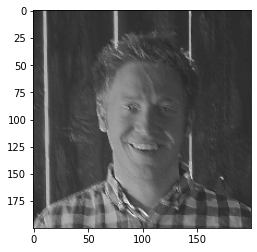

In [9]:
from skimage.measure import block_reduce

reduced = block_reduce(edges, (2,2), np.max)
plt.imshow(reduced, cmap="gray");

In [10]:
reduced.shape

(200, 200)

## Challenge

You will be expected to be able to describe convolution. 

# CNNs for Classification (Learn)

## Overview

### Typical CNN Architecture

![A Typical CNN](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/800px-Typical_cnn.png)

The first stage of a CNN is, unsurprisingly, a convolution - specifically, a transformation that maps regions of the input image to neurons responsible for receiving them. The convolutional layer can be visualized as follows:

![Convolutional layer](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

The red represents the original input image, and the blue the neurons that correspond.

As shown in the first image, a CNN can have multiple rounds of convolutions, [downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)) (a digital signal processing technique that effectively reduces the information by passing through a filter), and then eventually a fully connected neural network and output layer. Typical output layers for a CNN would be oriented towards classification or detection problems - e.g. "does this picture contain a cat, a dog, or some other animal?"


#### A Convolution in Action

![Convolution](https://miro.medium.com/max/1170/1*Fw-ehcNBR9byHtho-Rxbtw.gif)



Why are CNNs so popular?
1. Compared to prior image learning techniques, they require relatively little image preprocessing (cropping/centering, normalizing, etc.)
2. Relatedly, they are *robust* to all sorts of common problems in images (shifts, lighting, etc.)

Actually training a cutting edge image classification CNN is nontrivial computationally - the good news is, with transfer learning, we can get one "off-the-shelf"!

## Follow Along

In [11]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 20s 0us/step


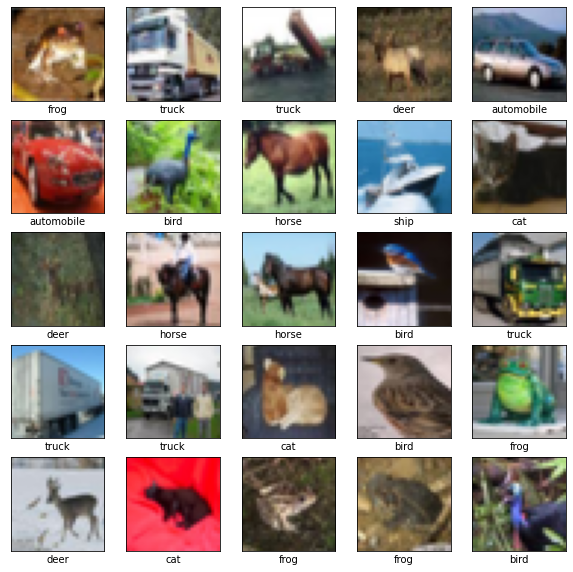

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [14]:
train_images[0].shape

(32, 32, 3)

In [15]:
train_labels[1]

array([9], dtype=uint8)

In [16]:
32*32*3

3072

In [17]:
# Setup Architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2))) # 2x2 is common
model.add(Conv2D(64, (3,3), activation='relu')) # 64 represents different convolutions; parameters that can be tuned (filters)
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten()) # classification layer
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [18]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Fit Model
model.fit(train_images, train_labels, 
          epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5214 - accuracy: 0.4469 - val_loss: 1.2785 - val_accuracy: 0.5393
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1408 - accuracy: 0.5964 - val_loss: 1.1123 - val_accuracy: 0.6019
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9857 - accuracy: 0.6539 - val_loss: 1.0752 - val_accuracy: 0.6320
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8871 - accuracy: 0.6878 - val_loss: 0.9024 - val_accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8150 - accuracy: 0.7152 - val_loss: 0.8728 - val_accuracy: 0.6967
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7582 - accuracy: 0.7340 - val_loss: 0.9069 - val_accuracy: 0.6824
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7072 - accuracy: 0.7521 - val_loss: 0.8671 -

In [20]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.8846 - accuracy: 0.7097


## For reference, how would this CNN perform on MNIST or Fashion-MNIST?

In [21]:
from tensorflow.keras.datasets import mnist

# Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize from 0-1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshaping the array to 4-dims so that it can work with the Tensorflow.Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Setup Architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print summary
model.fit(X_train, y_train, 
          epochs=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1360 - accuracy: 0.9582 - val_loss: 0.0534 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0407 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0280 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0277 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0283 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0360 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0335 -

In [22]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize from 0-1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshaping the array to 4-dims so that it can work with the Tensorflow.Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Setup Architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print summary
model.fit(X_train, y_train, 
          epochs=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4913 - accuracy: 0.8206 - val_loss: 0.3679 - val_accuracy: 0.8656
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3185 - accuracy: 0.8817 - val_loss: 0.3118 - val_accuracy: 0.8854
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2734 - accuracy: 0.8999 - val_loss: 0.2992 - val_accuracy: 0.8893
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2442 - accuracy: 0.9109 - val_loss: 0.3003 - val_accuracy: 0.8885
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2189 - accuracy: 0.9191 - val_loss: 0.2686 - val_accuracy: 0.9051
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1991 - accuracy: 0.9257 - val_loss: 0.2831 - val_accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1820 - accuracy: 0.9329 - val_loss: 0.2669 -

## Challenge

You will apply CNNs to a classification task in the module project.

# Transfer Learning for Image Classification (Learn)

## Overview

### Transfer Learning Repositories

#### TensorFlow Hub

"A library for reusable machine learning modules"

This lets you quickly take advantage of a model that was trained with thousands of GPU hours. It also enables transfer learning - reusing a part of a trained model (called a module) that includes weights and assets, but also training the overall model some yourself with your own data. The advantages are fairly clear - you can use less training data, have faster training, and have a model that generalizes better.

https://www.tensorflow.org/hub/

TensorFlow Hub is very bleeding edge, and while there's a good amount of documentation out there, it's not always updated or consistent. You'll have to use your problem-solving skills if you want to use it!

#### Keras API - Applications

> Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

There is a decent selection of important benchmark models. We'll focus on an image classifier: ResNet50.

## Follow Along

In [23]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_banana(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'banana':
      return entry[2]
  return 0.0

In [24]:
import requests

image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

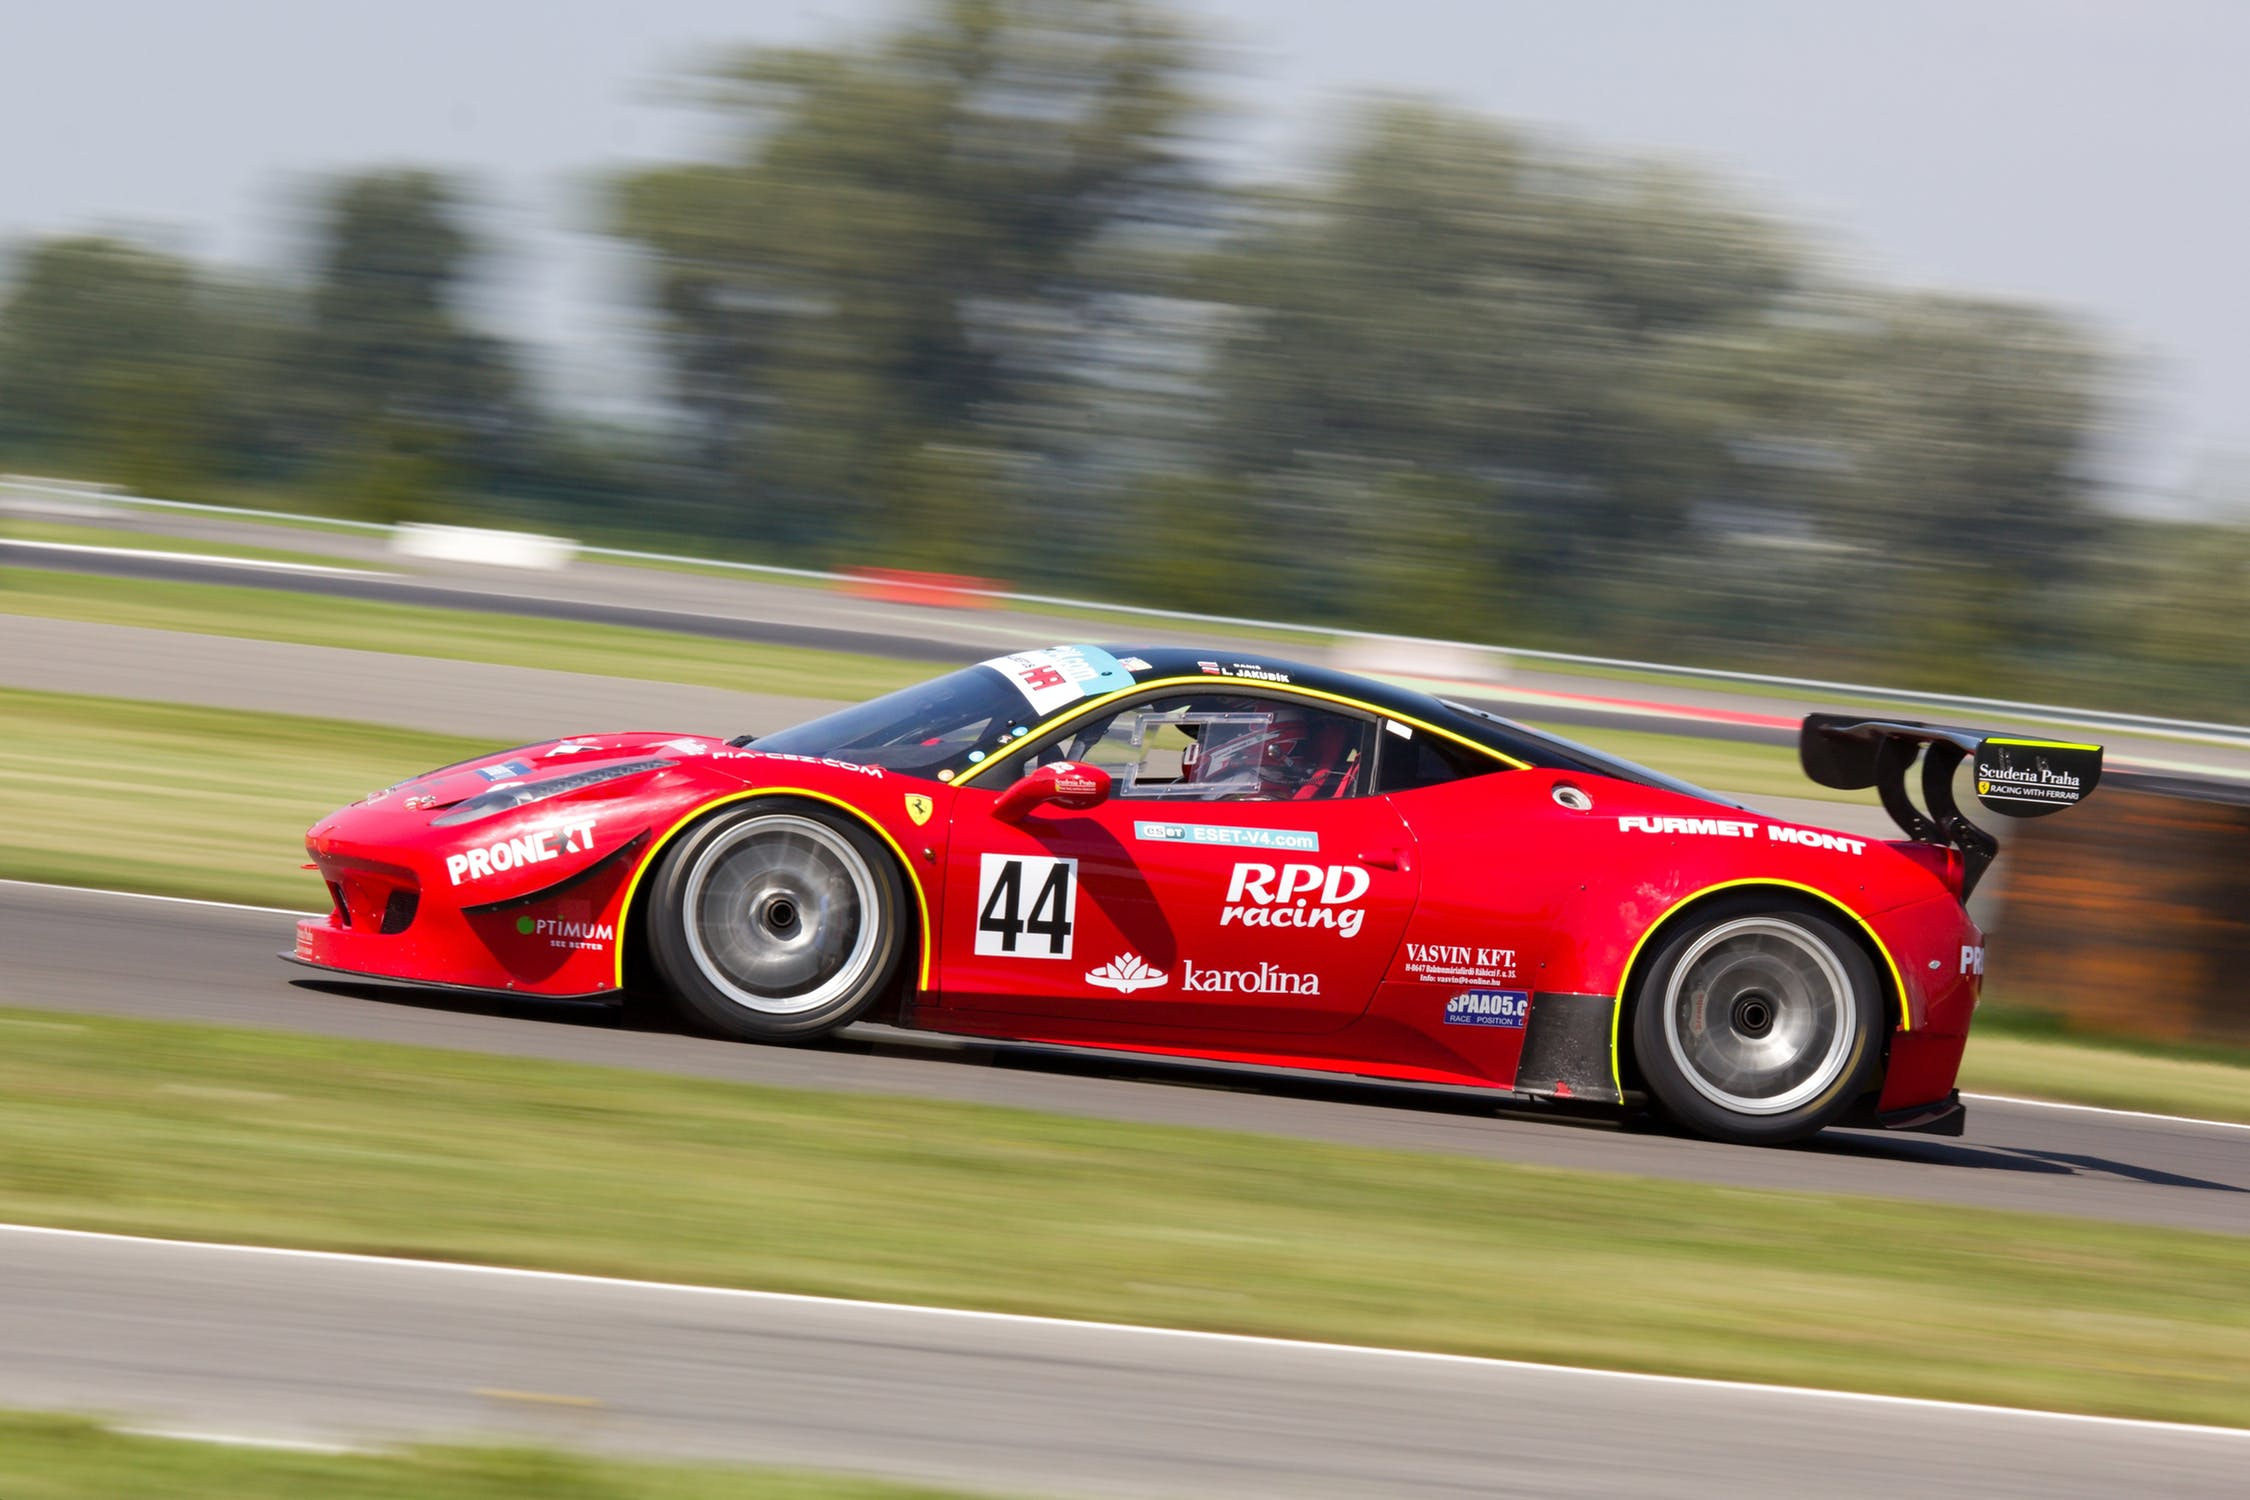

In [25]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [26]:
img_contains_banana(process_img_path('example0.jpg'))

40960/35363 [==================================] - 0s 1us/step
[('n04037443', 'racer', 0.9256288), ('n04285008', 'sports_car', 0.07028726), ('n04461696', 'tow_truck', 0.0021220297)]


0.0

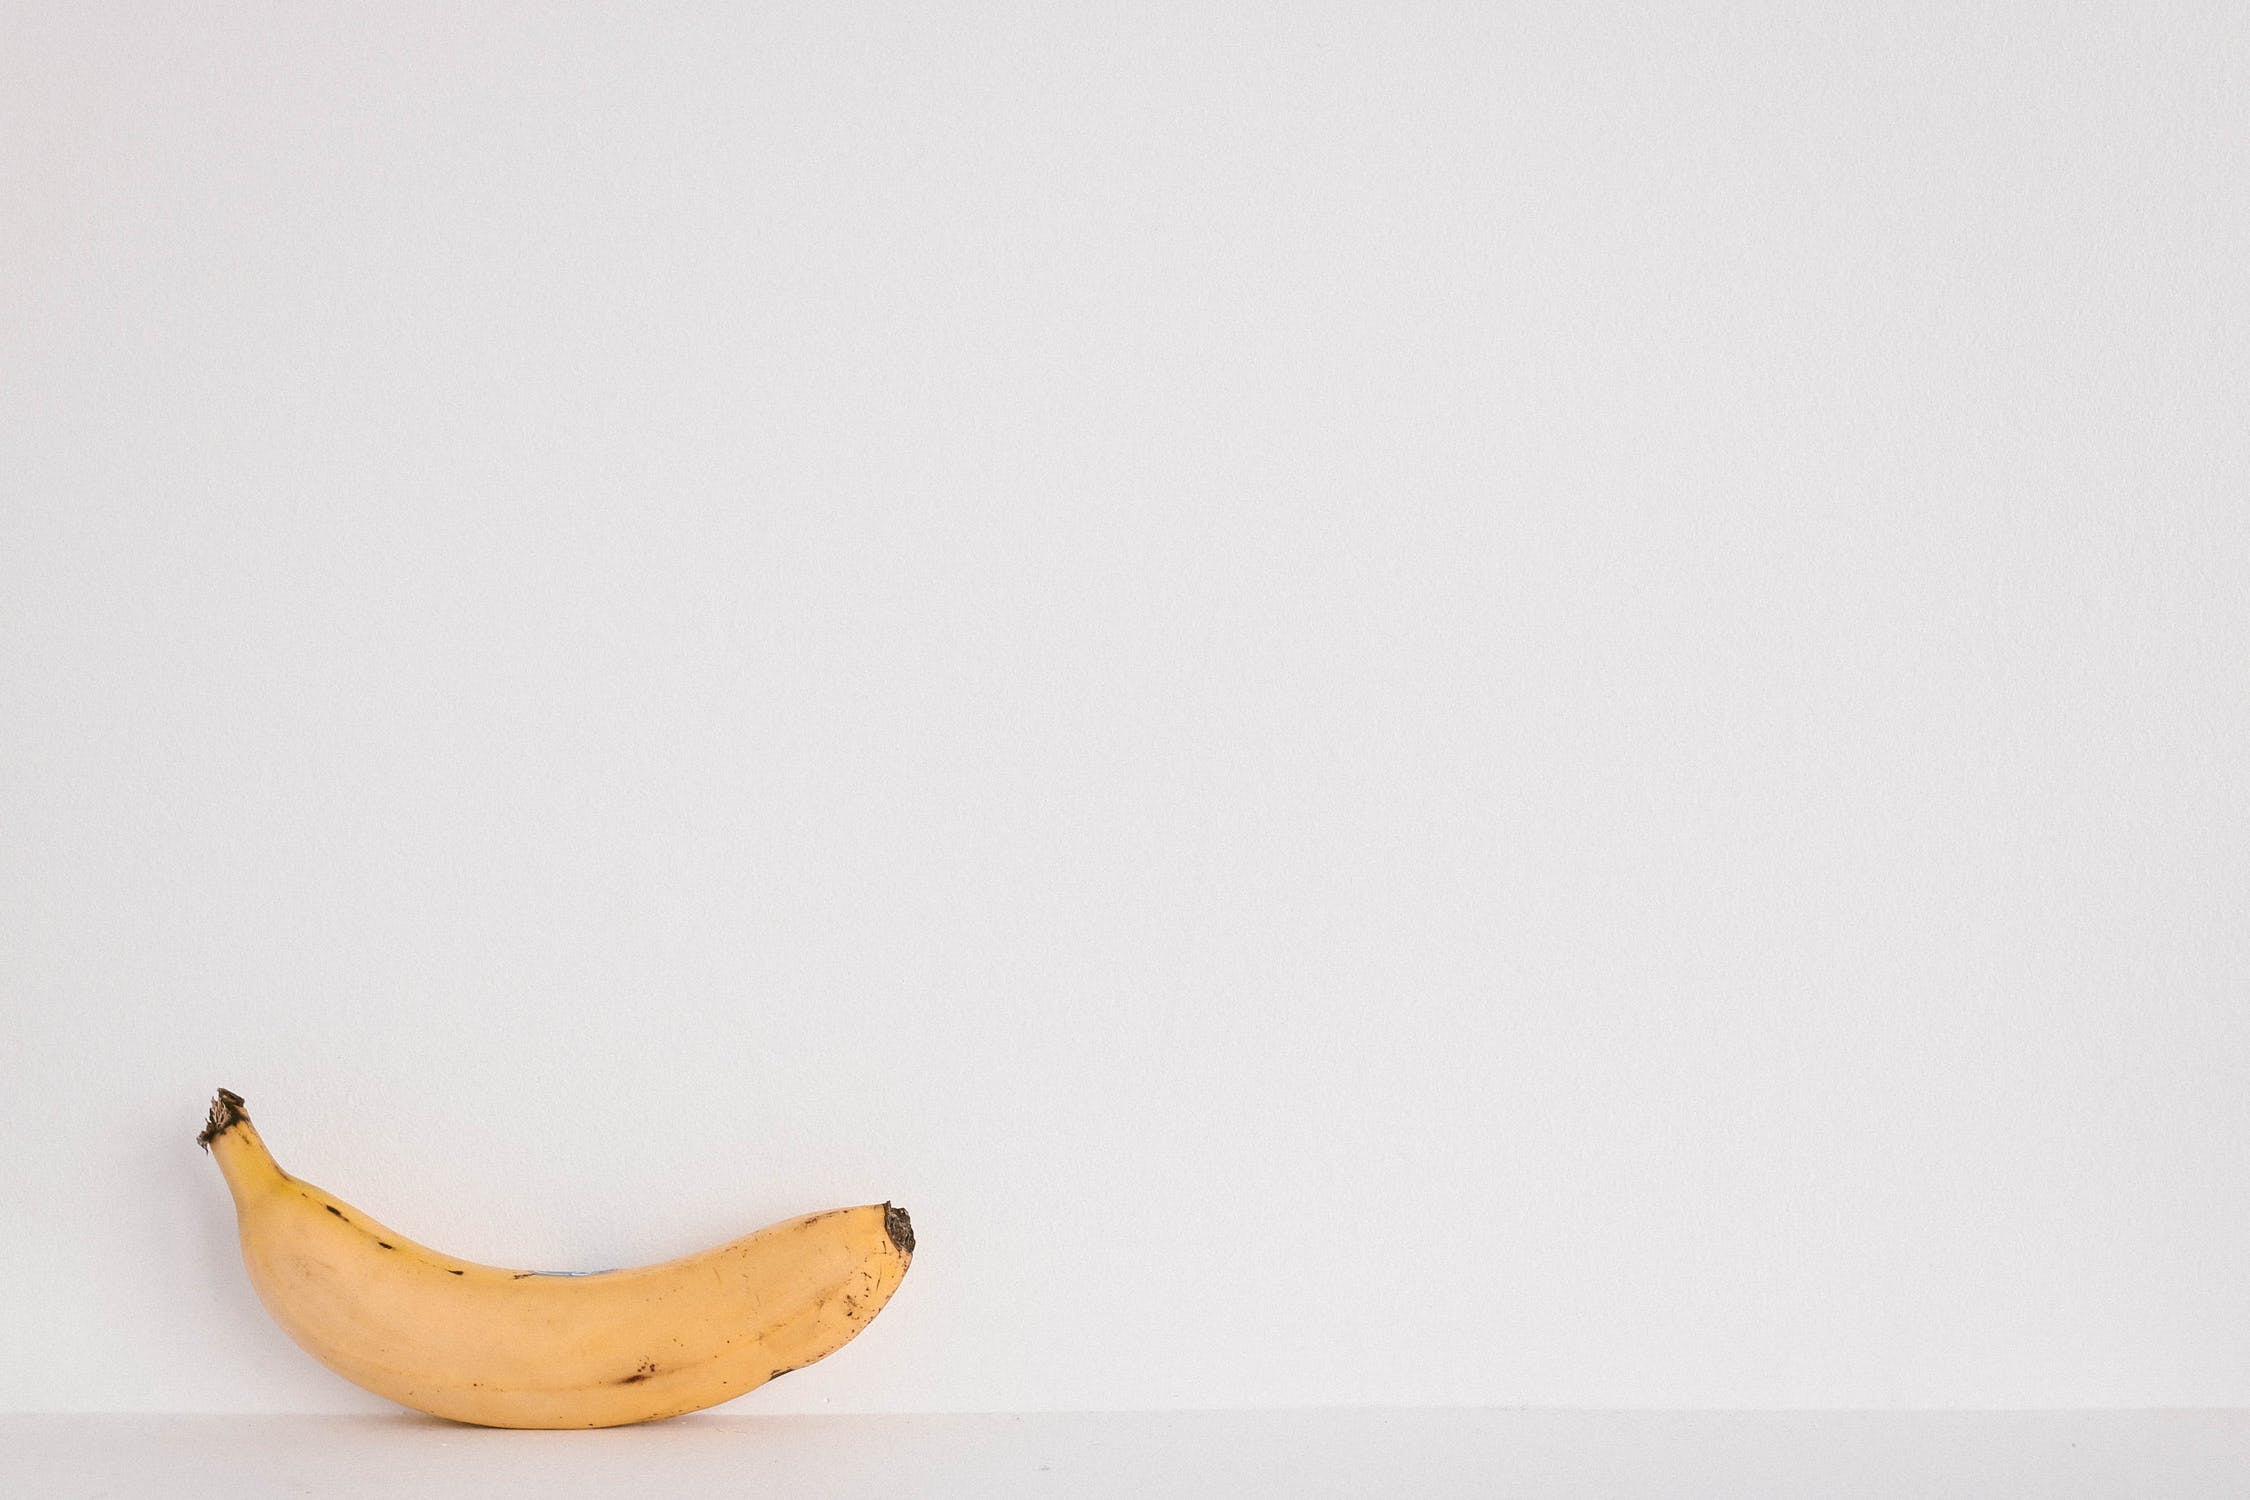

In [27]:
Image(filename='example1.jpg', width=600)

In [28]:
img_contains_banana(process_img_path('example1.jpg'))

[('n03532672', 'hook', 0.07773932), ('n07753592', 'banana', 0.070150524), ('n03498962', 'hatchet', 0.06332071)]


0.070150524

Notice that, while it gets it right, the confidence for the banana image is fairly low. That's because so much of the image is "not-banana"! How can this be improved? Bounding boxes to center on items of interest.

# (BONUS) Hot Dog vs. Not Hot Dog

<img src="https://blog.paperspace.com/content/images/size/w2000/2018/04/maxresdefault.jpg" style="width: 600px;">

In this next section, we will try to build our own Image Classification model to detect whether a picture contains a Hot Dog or Not (any other food item). The data was downloaded from this Kaggle repository: https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog

The Keras module includes three separate functions that can be used to train your model: `.fit`, `.fit_generator`, and `.train_on_batch`. All three of these functions can essentially accomplish the same task — but how they go about doing it is different.

The call to `.fit` is making two primary assumptions here:
- Our entire training set can fit into RAM
- There is no data augmentation going on (i.e., there is no need for Keras generators)

The call to `.fit_generator` enables us to:
- Iterate over a large data set that may not fit into memory.
- Enable us to perform data augmentation to avoid overfitting and increase the ability of our model to generalize.

The `.train_on_batch` function accepts a single batch of data, performs backpropagation, and then updates the model parameters.

For more information about data aumentations, feel free to review the following resources:
- Tensorflow Data Augmentation tutorial: https://www.tensorflow.org/tutorials/images/data_augmentation
- ImageDataGenerator Docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate two image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [30]:
# Define the batch size:
batch_size=32

# Define the train and validation generators: 
train_generator = train_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


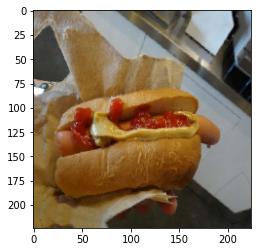

In [31]:
import matplotlib.pyplot as plt

plt.imshow(train_generator[0][0][1]);

In [32]:
# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                11944000  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [33]:
224*224*3

150528

In [34]:
cnn_hotdog = model.fit_generator(train_generator,
                                 epochs=10,
                                 validation_data=valid_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
16/16 [==============================] - 31s 2s/step - loss: 2.0847 - accuracy: 0.5120 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 30s 2s/step - loss: 0.6917 - accuracy: 0.5402 - val_loss: 0.6867 - val_accuracy: 0.5300
Epoch 3/10
16/16 [==============================] - 29s 2s/step - loss: 0.6791 - accuracy: 0.5723 - val_loss: 0.7073 - val_accuracy: 0.5380
Epoch 4/10
16/16 [==============================] - 31s 2s/step - loss: 0.6458 - accuracy: 0.6305 - val_loss: 0.7481 - val_accuracy: 0.5480
Epoch 5/10
16/16 [==============================] - 38s 2s/step - loss: 0.6408 - accuracy: 0.6185 - val_loss: 0.6971 - val_accuracy: 0.5620
Epoch 6/10
16/16 [==============================] - 31s 2s/step - loss: 0.6591 - accuracy: 0.5944 - val_loss: 0.6976 - val_accuracy: 0.5660
Epoch 7/10
16/16 [==============================] - 30s 2s/step - loss: 0.6216 - acc

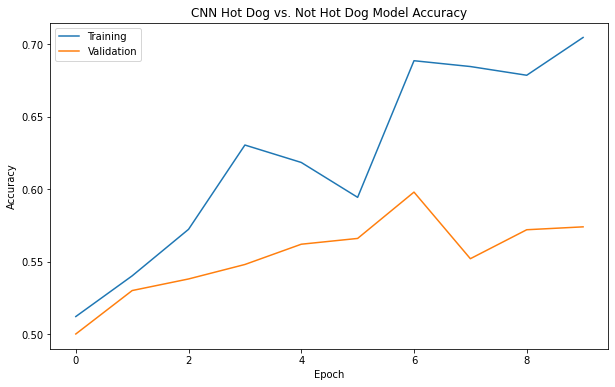

In [35]:
plt.figure(figsize=(10,6))
plt.plot(cnn_hotdog.epoch, cnn_hotdog.history['accuracy'], label='Training')
plt.plot(cnn_hotdog.epoch, cnn_hotdog.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('CNN Hot Dog vs. Not Hot Dog Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

# Hot Dog vs. Not Hot Dog with Transfer Learning

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

<br>
<img src="./convnet_components.png" style="width: 600px;">
<br>
<img src="./swapping_fc_classifier.png" style="width: 600px;">

In [36]:
from tensorflow.keras.applications.vgg19 import VGG19

# Load the pre-trained VVG19 Model
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224, 3),
              pooling=None)

# Freeze all the layers in the base VGGNet19 model
for layer in vgg19.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 3s 0us/step


In [37]:
from tensorflow.keras.layers import Dropout

# Instantiate the sequential model and add the VGG19 model
model = Sequential()
for layer in vgg19.layers:
    model.add(layer)

# Add the custom layers atop the VGG19 model
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model for training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [38]:
from tensorflow.keras.applications.vgg19 import preprocess_input

# Instantiate two image generator classes
# - Add preprocess_input function for vgg19
# - Remove scaling since that will be done in the preprocess_input function
train_datagen = ImageDataGenerator(
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    data_format='channels_last')

# Define the train and validation generators 
train_generator = train_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


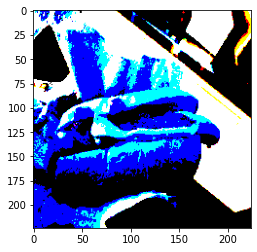

In [39]:
import matplotlib.pyplot as plt

plt.imshow(train_generator[0][0][1]);

In [41]:
vgg_hotdog = model.fit_generator(train_generator,
                                 epochs=10,
                                 validation_data=valid_generator)

Epoch 1/10
16/16 [==============================] - 379s 24s/step - loss: 3.1601 - accuracy: 0.8614 - val_loss: 3.7022 - val_accuracy: 0.8680
Epoch 2/10
16/16 [==============================] - 375s 23s/step - loss: 2.5761 - accuracy: 0.9016 - val_loss: 3.7453 - val_accuracy: 0.8760
Epoch 3/10
16/16 [==============================] - 336s 21s/step - loss: 1.8057 - accuracy: 0.9217 - val_loss: 3.5376 - val_accuracy: 0.8840
Epoch 4/10
16/16 [==============================] - 284s 18s/step - loss: 1.6130 - accuracy: 0.9297 - val_loss: 3.9369 - val_accuracy: 0.8880
Epoch 5/10
16/16 [==============================] - 273s 17s/step - loss: 0.9185 - accuracy: 0.9458 - val_loss: 4.4119 - val_accuracy: 0.8760
Epoch 6/10
16/16 [==============================] - 270s 17s/step - loss: 1.1784 - accuracy: 0.9478 - val_loss: 5.2642 - val_accuracy: 0.8580
Epoch 7/10
16/16 [==============================] - 267s 17s/step - loss: 2.2803 - accuracy: 0.9116 - val_loss: 8.3127 - val_accuracy: 0.8440
Epoch 

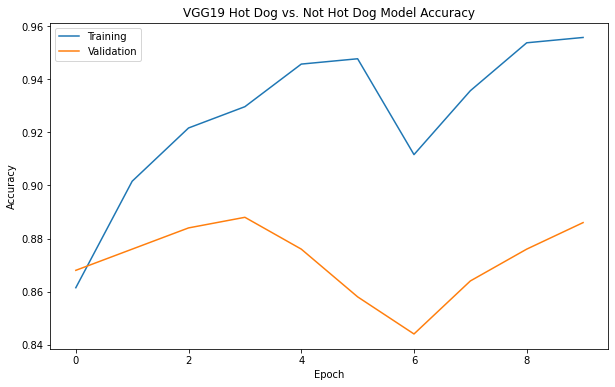

In [42]:
plt.figure(figsize=(10,6))
plt.plot(vgg_hotdog.epoch, vgg_hotdog.history['accuracy'], label='Training')
plt.plot(vgg_hotdog.epoch, vgg_hotdog.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('VGG19 Hot Dog vs. Not Hot Dog Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

# Moment of Truth...

In [43]:
import cv2

img1 = cv2.imread('./hotdog_1.jpg')
img2 = cv2.imread('./hotdog_2.jpg')
print(img1.shape, img2.shape)

(4032, 3024, 3) (4032, 3024, 3)


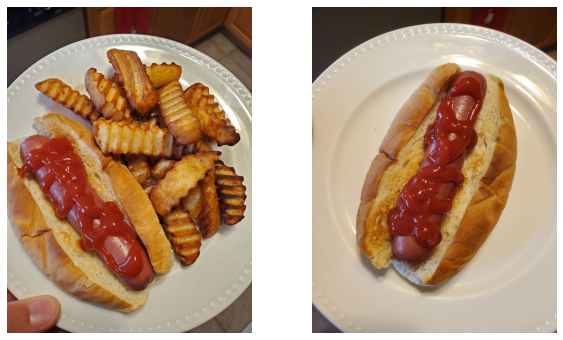

In [44]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off");

In [45]:
import tensorflow as tf

img1_reshaped = tf.image.resize(img1, [224, 224])
img2_reshaped = tf.image.resize(img2, [224, 224])
print(img1_reshaped.shape, img2_reshaped.shape)

(224, 224, 3) (224, 224, 3)


In [46]:
img1_final = tf.expand_dims(img1_reshaped, axis=0)
img2_final = tf.expand_dims(img2_reshaped, axis=0)
print(img1_final.shape, img2_final.shape)

(1, 224, 224, 3) (1, 224, 224, 3)


In [47]:
train_generator.class_indices

{'hot_dog': 0, 'not_hot_dog': 1}

In [48]:
model.predict(preprocess_input(img1_final), steps=1)

array([[0., 1.]], dtype=float32)

In [49]:
model.predict(preprocess_input(img2_final), steps=1)

array([[1.9178634e-28, 1.0000000e+00]], dtype=float32)

## Challenge

You will be expected to apply a pretrained model to a classificaiton problem today. 

# Review

- <a href="#p1">Part 1: </a>Describe convolution and pooling
    * A Convolution is a function applied to another function to produce a third function
    * Convolutional Kernels are typically 'learned' during the process of training a Convolution Neural Network
    * Pooling is a dimensionality reduction technique that uses either Max or Average of a feature map region to downsample data
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
    * Keras has layers for convolutions :) 
- <a href="#p3">Part 3: </a>Transfer Learning for Image Classification
    * Check out both pretinaed models available in Keras & TensorFlow Hub

# Sources

- *_Deep Learning_*. Goodfellow *et al.*
- *Hands-on Machine Learnign with Scikit-Learn, Keras & Tensorflow*
- [Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)
- [Tensorflow + Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Convolution Wiki](https://en.wikipedia.org/wiki/Convolution)
- [Keras Conv2D: Working with CNN 2D Convolutions in Keras](https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [A Beginner's Guide to Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)